# Homework 5: Confidence Intervals, Autograders, Freethrows
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday April 6th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats
%matplotlib inline

### [20 points] Problem 1 - Alcohol Content of Red vs White Wine 
***

Load the data in $\texttt{winequality-red.csv}$ and $\texttt{winequality-white.csv}$ into Pandas DataFrames.  A description of this dataset can be found on [Berkeley's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The characteristic that we'll be interested in is the wine's alcohol content.  

In [2]:
dfred = pd.read_csv("data/winequality-red.csv", delimiter=';')
dfwhite = pd.read_csv("data/winequality-white.csv", delimiter=';')


In [52]:
dfred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dfwhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Part A**: Are we justified in using the assumptions of the Central Limit Theorem in our analysis of estimates of the mean of the data?  Justify your response. 

** Yes, since m and n in both cases are greater than 30 samples, we can justify the use of CLT. This is not mathematically always true that n=30 is good enough, but in our case we have much greater samples than this.**

**Part B**: Compute a 95% confidence interval for the mean of the red wine's alcohol content.  Separately, compute a 95% confidence interval for the mean of the white wine's alcohol content. Do all computations in Python. 

In [5]:
CI = .95
alpha = 1 - CI
Z = stats.norm.ppf(1-alpha/2)
print(Z)

1.959963984540054


95% Confidence interval for the mean is given by:

$P(\bar{X} - Z_\frac{\alpha}{2}*\frac{\sigma}{\sqrt{n}} \le \mu \le \bar{X} + Z_\frac{\alpha}{2}*\frac{\sigma}{\sqrt{n}})$

Thus, our confidence interval will look like:

$[\bar{X} - 1.96 * \frac{\sigma}{\sqrt{n}}, \bar{X} + 1.96 * \frac{\sigma}{\sqrt{n}}]$

In [6]:
red_desc = dfred["alcohol"].describe()
#get xbar, which is our mean
xbar = red_desc['mean']
#sigma
red_sigma = red_desc['std']
#get number of samples
m = dfred.count()[1]

#now compute our 95% CI
red_CI = [xbar-(Z)*red_sigma/np.sqrt(m), xbar+(Z)*red_sigma/np.sqrt(m)]
print("red sample mean: {}".format(xbar))
print("95% Confidence Interval for red wine's alcohol content: {}".format(red_CI))


white_desc = dfwhite["alcohol"].describe()
#get xbar, which is our mean
ybar = white_desc['mean']
#sigma
white_sigma = white_desc['std']
#get number of samples
n = dfwhite.count()[1]

#now compute our 95% CI
white_CI = [ybar-(Z)*white_sigma/np.sqrt(n), ybar+(Z)*white_sigma/np.sqrt(n)]
print("white sample mean: {}".format(ybar))

print("95% Confidence Interval for white wine's alcohol content: {}".format(white_CI))

#white_desc
#red_desc

red sample mean: 10.422983114446502
95% Confidence Interval for red wine's alcohol content: [10.370750037060759, 10.475216191832246]
white sample mean: 10.514267047774638
95% Confidence Interval for white wine's alcohol content: [10.479803270898106, 10.54873082465117]


** Great, so our sample mean lies halfway between our confidence intervals for both! In repeated sampling of the mean, we should expect that 95% of the time, our sampling will yield a mean that lies within these confidence intervals for the respective wine samplings**

**Part C**: Compute the 95% confidence interval for the difference between the means of the alcohol content of red and white wine. 

Okay, so now we want the CI for the difference of the means.

$\bar{x} - \bar{y} \pm Z_\frac{\alpha}{2}*\sqrt{ \frac{\sigma_1^2}{m} + \frac{\sigma_2^2}{n}    }$

In [7]:
CI = [xbar-ybar - Z*np.sqrt((red_sigma**2)/m + (white_sigma**2)/n), xbar-ybar + Z*np.sqrt((red_sigma**2)/m + (white_sigma**2)/n)]
print("95% confidence interval for difference between red and white wines: {}".format(CI))


95% confidence interval for difference between red and white wines: [-0.15386225457264, -0.0287056120836309]


**Part D**: Interpret the confidence interval you computed in **Part C** in one or two sentences.  Can you say that it's likely that there is a difference in mean alcohol content between red and white wine?  

** Since our 95% confidence interval does not contain 0, we can say that there is likely a difference between the mean alcohol content of red and white wines. **

### [15 points] Problem 2: Election Polling
***

On the eve of an important senate seat election, a pollster polls a simple random sample of the population and asks which candidate they plan to vote for on the following day. In particular, the pollster asks if the respondents plan to vote for Candidate A, Candidate B, or some other candidate.  The results of the poll can be found in the following table: 

\begin{array}{ccc}
\hline 
\textrm{Candidate A} & \textrm{Candidate B} & \textrm{Other} \\
\hline 
1204 & 1099 & 205  \\
\hline 
\end{array}

**Part A**: Poll results are typically reported as a predicted **percentage** of the electorate plus or minus a margin of error, i.e. $\texttt{percentage} \pm \texttt{margin}$.  Express the poll results for Candidates A and B in the specified format at the 95% confidence level. 

In [8]:
#it looks like candidate a only got about 100 more votes than candidate b, 
#see confidence intervals for proportions (slides)
#2 paths:
# confidence interval for a's proportion, and a confidence interval for b's proportion, if they overlap, then we cant be sure about a decisive winner 
#sigma =1?

CA = 1204
CB = 1099
total = 205+CA+CB

p1 = CA/total
p2 = CB/total

CI = .95
alpha = 1-CI

z = stats.norm.ppf(alpha/2)
#print(z)
#print(p1, p2)

p1_margin = (z * (p1*(1-p1))/1204)
p2_margin = (z * (p2* (1-p2))/1099)
p1_min = p1 + p1_margin
p1_max = p1 - p1_margin
p2_min = p2 + p2_margin
p2_max = p2 - p2_margin
p1CI = [p1_min, p1_max]
p2CI = [p2_min, p2_max]
print("p1 perentage ± margin for 95% CI : {} ± {}".format(p1, p1_margin))
print("p2 percentage ± margin for 95% CI : {} ± {}".format(p2, p2_margin))







p1 perentage ± margin for 95% CI : 0.4800637958532695 ± -0.00040632226251437675
p2 percentage ± margin for 95% CI : 0.4381977671451356 ± -0.0004390399293579424


**Part B**: Express the poll results as 95% confidence intervals.  Based on these results, would it be responsible for a newspaper to definitely call the election for a particular candidate? Clearly justify your response. 

In [9]:
print("CI at 95% for p1: {}".format(p1CI))
print("CI at 95% for p2: {}".format(p2CI))

CI at 95% for p1: [0.47965747359075517, 0.4804701181157839]
CI at 95% for p2: [0.43775872721577763, 0.43863680707449354]


** This indicates that our candidate won the election decisively, since our confidence intervals do not overlap. However, this is not grounds to call the election. There are many examples where early calling causes lots of problems. I believe that this shows very strong support for the leader, but this is all that it does. We should expect that there is still a chance for the underdog to come back and win. This means that it would be irresponsible for the newspaper to call it early. **

**Part C**: In the run-up to the next election, the pollster is designing a poll of a city council race between two relatively unknown candidates.  Without having any prior data, how many respondents does the pollster need responses from to guarantee that she will get at most a 2% margin of error at the 95% confidence level? Be sure to **clearly** justify your reasoning.  

**Hint**: Recall that when computing a confidence interval for proportion we use the actual sample proportion to approximate the variance.  How can you get a worst-case scenario estimate of the variance when the sample proportion is not known _a priori_? 


In [10]:
stats.norm.ppf(1-.05)


1.6448536269514722

The worst case scenario for the CI is when $\hat{p} = 1/2$

$$\hat{p} \pm Z_\frac{\alpha}{2} * \sqrt{ \frac{\hat{p}*(1-\hat{p})}{n}   }$$

Now, with phat = 1/2, we just need to solve for n, such that we get a margin of .02.

$$.02 = Z_\frac{\alpha}{2} * \sqrt{ \frac{\hat{p}*(1-\hat{p})}{n} }$$

$$.02 = 1.64 * \sqrt{ \frac{.5*(.5)}{n} }$$

$$\frac{.02}{1.64} = \sqrt{ \frac{.5*(.5)}{n} }$$ 

$$(\frac{.02}{1.64})^2 =  \frac{.5*(.5)}{n} $$ 



** Solve for n and we get $n = 20.5607$ which we will round to 21. We need a sample size of at least 21 in the worst case in order to ensure we will not have a margin greater than .02. **

### [15 points] Problem 3 - Have Opinions on Marijuana Legalization Changed? 
***

The General Social Survey (GSS) has been collecting demographic, behavioral, and attitudinal information since 1972 to monitor changes within the US and to compare the US to other nations. Support for the legalization of marijuana in the US is shown for 2010 and in 2016 in the following table:


\begin{array}{cccc}
\hline
\textrm{Year} & \textrm{Favor} & \textrm{Oppose} & \textrm{Total} \\ 
\hline
\textrm{2010} & \textrm{603} & \textrm{656} & \textrm{1259} \\
\textrm{2016} & \textrm{1126} & \textrm{717} & \textrm{1843} \\
\hline
\end{array}


**Part A**: Find a 95% confidence interval for the change in the proportion supporting marijuana legalization from 2010 to 2016. Use Python for all computations and show your work. 

The equation for CI for difference in proportions:

$\hat{p}_1 - \hat{p}_2 \pm Z_\frac{\alpha}{2}\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{m} + \frac{\hat{p}_2(1-\hat{p}_2)}{n}}$

To add to this, p1 and p2 ordering does not matter, but for this case, I will swap their places to get a positive CI because it makes more sense to me. 

In [11]:
# confidence intervals for proportions again
x = 603
y = 1126
m = 1259
n = 1843
CI = .95
alpha = 1-CI
p1hat = x/m
p2hat = y/n
z = stats.norm.ppf(alpha/2)
#print(alpha, z)


CI95 = [(p2hat - p1hat) + z * (np.sqrt((p2hat*(1-p2hat)/n) + (p1hat*(1-p1hat)/m))),
        (p2hat - p1hat) - z * (np.sqrt((p2hat*(1-p2hat)/n) + (p1hat*(1-p1hat)/m)))]
print(p1hat < p2hat)
print("Our 95% CI: {}".format(CI95))


True
Our 95% CI: [0.09655644289791579, 0.16746124074028]


** Since our interval does not contain 0, we can say that the change in proportion supporting marijuana is statistically significant at the 95% CI **

**Part B**: Is it likely that the proportion supporting marijuana legalization changed between 2010 and 2016? Justify your conclusion using the ideas of statistical inference and your results from **Part A**. 

** From our samples, we can see that the proportion p1hat < p2hat. Further, we have shown from the 95% CI that this is statistically significant. The support levels for marijuana from 2010 to 2016 has gone up. **

### [20 points] Problem 4 - Exploring Confidence Intervals 
***

The so-called [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution is important in several statistical tests.  It's also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [chi2](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chi2.html). 


In [12]:
from scipy.stats import chi2

**Part A**: Complete the following code cell to plot a histogram of realizations from the Chi-squared distribution with parameter $K=3$. 

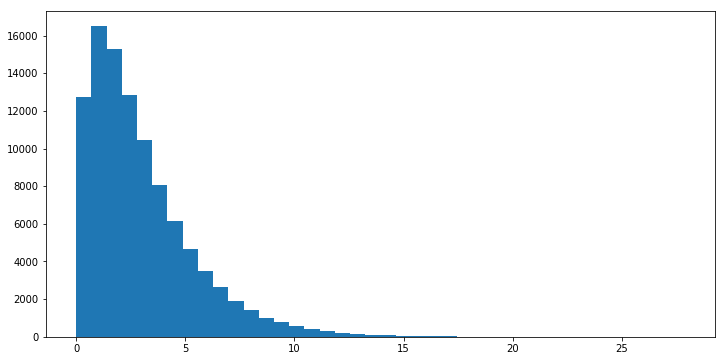

In [25]:
k = 3 
x = chi2.rvs(k, size=100000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
#for x in np.arange(0,10):
#    ax.plot([x,x],[x+1,x-2])

ax.hist(x, bins = 40)
ax

**Part B**: Look up the mean and variance of the Chi-squared distribution with parameter $k=3$ and report them here. 

Chi-squared mean = $k$

Chi-squared variance = $2k$

For our purposes for $k = 3$, $mean = 3$, $variance = 6$


**Part C**: In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Chi-squared distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Chi-squared distribution with parameter $k=3$.  For each random sample, compute the 95% confidence interval for the mean.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\mu$ where $\mu$ is the true mean of the distribution. Color confidence intervals black if they cover the true mean, and red if they don't.  

Notes for myself:

K=3 -> "degrees of freedom"

n=100 -> "sample size"

m=500 -> "number of sample means with sample size n"


In [14]:
def chi_int(percent, xbar, var, n):
    #print(var)
    alpha = 1-percent
    sigma = np.sqrt(var)
    Z = stats.norm.ppf(1-alpha/2)
    #"print(Z)
    CI = (xbar - Z * (sigma/np.sqrt(n)) , xbar + Z * (sigma/np.sqrt(n)))
    #print(CI)
    return(CI)

print(stats.chi2.ppf(.025, 10-1))
print(stats.chi2.ppf(1-.025, 10-1))



2.700389499980358
19.02276779864163


In [15]:
#tests
arr = [0]*50
for i in range(50):
    arr[i] = chi2.rvs(3,100)
    
x = 3
if(1 < x < 5):
    print(True)
else:
    print(False)
    

True


In [49]:
def confidence_intervals(m=500, n=100):
    number_out = 0
    k = 3
    var = 2 * k
    true_mean = 3
    confid_interval = [0] * m
    sample_confid = [0]*50
    
    # m is the number of CIs we want to make
    # n is the number os kai sq draws that we care getting from each CI
    
    #recipe for generating single CI for the mean.
    # 1. draw n samples from chi2(k=3), call that x
    #x = chi2.rvs(k, n) #why not size = 100?
    # 2. compute the sample mean of x, call that x bar
    #xbar = x.mean()
    for i in range(m):
        x = chi2.rvs(k, size=n)
        xbar = np.mean(x)
        xvar = np.var(x)
        #print(xvar)
        # 3. CI = xbar  +- z_{\aplha / 2} sigma / sqrt(n)
        confid_interval[i] = chi_int(.95, xbar, xvar, n)

    #select 50 of these CIs randomly
    sel_index = np.random.choice(500, 50, replace=False)
    for i in range(len(sel_index)):
        #store each into new array for plotting
        sample_confid[i] = confid_interval[sel_index[i]]
    
    
    #recipe for testing if the true mean is in the CI
    # 4. Test if the true mean (which we know) is >= lower and <= upper
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    # recipe to make the CI plot
    x = np.linspace(1,50,50)
    y = k*np.array([1]*50)
    ax.plot(x,y, color='green',linewidth=3)
    # 4. plot the CI as a long segment that goes from (x0,y0) -> (x1, y1)
    # (x, lowerbound) -> (x, upperbound)
    for i in range(50):
        if(sample_confid[i][0] < y[i] < sample_confid[i][1]):
            ax.plot([x[i],x[i]], sample_confid[i], color = 'black')
        else:
            ax.plot([x[i],x[i]], sample_confid[i], color = 'red')
            number_out+=1
    ax.set_xlim([-1, 51])
    
    plt.title("Random 50 samples of CIs from chi2 distribution using 100 samples and k=3")
    plt.xticks([i for i in range(1,51)])
    plt.xlabel("CI sample number")
    plt.ylabel("Confidence Intervals")
    return("Percent of CIs that contain the true mean: {} %".format(50-number_out/50))
    


Percent of CIs that contain the true mean: 49.94 %


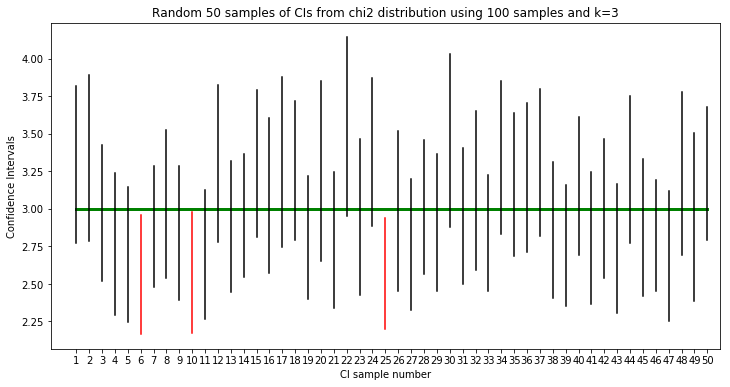

In [50]:
print(confidence_intervals())

**Part D**: Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

** Yes, we should expect that 95% of our CIs capture the true mean. I am mostly getting 2-4 confidence intervals which do not cover the mean. This yields an error rate of about 5%. We should expect that when we construct a 95% CI, that there is a 5% chance that our CI does not contain the true mean. **

** I also ran this function many times to check that this was indeed True, which resulted in an angry message from python for multiple figure prints! D:
**

### [15 points] Problem 5 - Autograding Simulation Homework 
***

Suppose that you are the grader for an Introduction to Data Science course and your boss has asked you to write an autograder for a homework problem on simulation.  Specifically, students have been asked to write a simulation to estimate the expected number of rolls it will take until doubles are rolled with a pair of fair, six-sided dice (i.e. until both dice show the same value).  The students have been asked to structure their code so that it runs many trials of the experiment and returns the sample mean of the trials, as well as an array containing the result of each individual trial. 

The solutions submitted by three students in the course are given below. 

In [18]:
def student1(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 0
        while np.random.choice([1,2,3,4,5,6]) != np.random.choice([1,2,3,4,5,6]):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student2(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 1
        while int(6*np.random.uniform(0,1)+1) != int(6*np.random.uniform(0,1)+1):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student3(num_trials=5000):
    t = np.random.exponential(6, size=num_trials)
    return np.mean(t), t 

Now, you landed this job at the last minute, and your probability theory is a little rusty.  Luckily, your boss has given you his solution to the problem which is shown below: 

In [19]:
def prof(num_trials=5000):
    t = np.random.geometric(1/6, size=num_trials)
    return np.mean(t), t

Knowing that your probability theory is rusty, your boss has suggested that your autograder be constructed solely based on confidence intervals to compare the students' estimates of the expected value of the experiment to his own estimate.  Finally, although there are only examples from three students above, there are actually more than 100 students in the course, so tailoring your tests to features of individual students' code is out of the question. 

**Part A**: Complete the function autograder below, which takes in the realizations of the trials from your professor's code and one of the students' codes, as well as the $\alpha$ for a $100(1-\alpha)\%$ confidence interval and returns a string indicating whether the student passed or failed the test. **Clearly** indicate what statistical test(s) your autograder is using and why this is a good idea.  Then demonstrate the use of your autograder to grade the three student solutions above. 

In [20]:
def autograder(pf, st, alpha=0.05):
    #construct CI for student:
    st_mean = st[0]
    st_var = np.var(st[1])
    st_n = len(st[1])
    st_CI = [st_mean - stats.norm.ppf(1-alpha)*np.sqrt(st_var)/np.sqrt(st_n), st_mean + stats.norm.ppf(1-alpha)*np.sqrt(st_var)/np.sqrt(st_n)]
    
    #construct CI for teacher
    pf_mean = pf[0]
    pf_var = np.var(pf[1])
    pf_n = len(pf[1])
    pf_CI = [pf_mean - stats.norm.ppf(1-alpha)*np.sqrt(pf_var)/np.sqrt(pf_n), pf_mean + stats.norm.ppf(1-alpha)*np.sqrt(pf_var)/np.sqrt(pf_n)]
    
    print(st_CI, pf_CI)
    
    
    if st_CI[0] <= pf_CI[1] and pf_CI[0] <= st_CI[1]:
        return "Passed"
    else:
        return "Failed"

st1 = student1()
st2 = student2()
st3 = student3()
pro = prof()
print("student1: {}".format(autograder(pro, st1) or autograder(pro, st1) or autograder(pro, st1)))
print("student2: {}".format(autograder(pro, st2) or autograder(pro, st2) or autograder(pro, st2)))
print("student3: {}".format(autograder(pro, st3) or autograder(pro, st3) or autograder(pro, st3)))
#print(st1[0])
#print(st2[0])
#print(st3[0])
#print(pro[0])
#print(np.var(pro[1]))
#print(True or False or False)



[4.904156307769403, 5.173443692230597] [5.874176359868037, 6.129823640131963]
student1: Failed
[5.75453561186318, 6.00226438813682] [5.874176359868037, 6.129823640131963]
student2: Passed
[5.742608984880155, 6.021760990137299] [5.874176359868037, 6.129823640131963]
student3: Passed


**I computed the variance, and mean or students and the professor and checked if they overlapped. Given to us in the function we used alpha=.05 for a 95% CI. This should mean that each time we compute this, we should only grade 1/20 students incorrectly. **

**However, these odds aren't in our favor. Thus, I computed them three times, and then we should find that if any of these CIs produced a Passed grade for a student, then they indeed have the correct mean with a very small false negative rate. .05^3 = 0.000125% chance **



**[Extra Credit] Part B**: You realize that tests based solely on the estimate of the mean are not robust.  Come up with a better autograder that, again using tests based on confidence intervals, compares the students' solutions to the professor's solutions on statistical properties beyond just the mean. Again, **clearly** motivate the features of your autograder based on theory developed in class.    

### [15 points] Problem 6 - Freethrows
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You are driving through the paint toward the basket when Steph Curry fouls you. You step to the line to sink this freethrow shot, which is delivered in the form of a CSCI3022 problem:</font>

You have a shuffled deck of cards. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip over the third Jack.  You repeat this many times. Simulate this process. Plot a histogram with binsize=1 of the outcomes. Compute the mean, median, and mode for this dataset, indicate them on the plot too. Look up how to do a legend in MatPlotLib, and label your histogram, mean, median.
***

31.7507 33.0 34
{4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51}


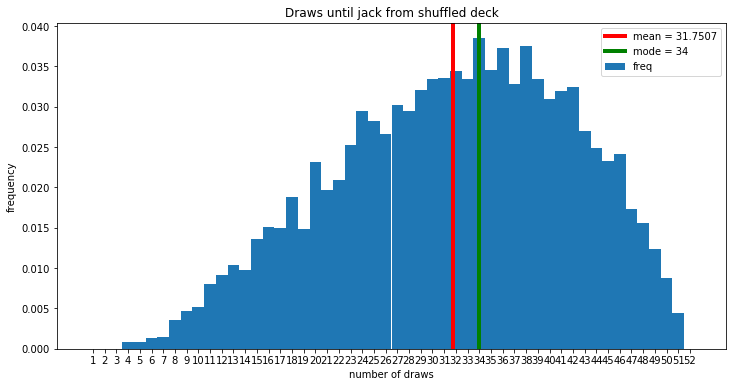

In [21]:
deck = [i for i in range(1,14)]*4

def sample(num_samples=10000):
    results = []
    for j in range(num_samples): 
        selection = np.random.choice(deck, 52, replace = False)
        jack_count = 0
        for i in range(52):
            if(selection[i] == 11):
                jack_count+=1
            if(jack_count == 3):
                results.append(i+1)
                break
                
    return(results)
results = sample()
#print(results)
mean = np.mean(results)
median = np.median(results)
mode = stats.mode(results)[0][0]
print(mean, median, mode)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
#print(np.sort(results))
plt.hist(results, normed=True, bins=[i+.5 for i in range(53)], label = 'freq')
plt.axvline(mean, color = 'red', linewidth=4, label='mean = {}'.format(mean))
plt.axvline(mode, color = 'green', linewidth=4, label='mode = {}'.format(mode))
plt.legend()
plt.title("Draws until jack from shuffled deck")
plt.ylabel("frequency")
plt.xlabel('number of draws')
plt.xticks([i for i in range(1,53)])
print(set(results))
plt.show()


**Part B**: <font color='green'>You sink your first free throw and immediately get dap from your teammates, Jerry Ferguson and Steve Ferguson. You prepare to take anotter shot, which—and you're not going to believe this—is another CSCI3022 problem:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?
***

**A 99% confidence interval is wider because it captures more possible desired values. Imagine we have a school of fish, and each fish represents a value we want to capture. If we cast a net that captures 95% of the fish that is great. However, we missed some of the fish. We need a bigger net to capture 99% of the fish in our net. This net has to be much bigger the higher percentage we want, because some of those pesky fish are in some strange parts of the lake. **

**Part C**: <font color='green'>The crowd is silent. Everything is slow motion. You're literally in the air, releasing what looks to be a perfect shot to tie the match. As you release the ball, a hand appears to block it. It is Kevin Durant. :( 

Luckily, his fingertips also brush against your arm. That's a foul, and everyone saw it. Back to the line. Back to CSCI3022:</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **durant**, below. Compute a 95% confidence interval for the standard deviation.
***

In [22]:
durant = np.array([3.7778,3.9459,3.8248,4.1111,4.0180,4.0898,4.0380,3.9273,3.9614,3.8387])

In [23]:
#dont forget to subtract 1 from n?
var = np.var(durant, ddof=1)
n = len(durant)
alpha = .05
x1a2 = stats.chi2.ppf(alpha/2, 9)
xa2 = stats.chi2.ppf(1-alpha/2, 9)
CI = [np.sqrt(((n-1)*var)/xa2), np.sqrt(((n-1)*var)/x1a2)]
#print(xa2, x1a2)
print("Answer: 95% Confidence Interval for random variable X: {}".format(CI))




Answer: 95% Confidence Interval for random variable X: [0.07813493626414877, 0.20738097418499923]


**Part D**: <font color='green'>You are watching tape footage at halftime with your personal trainer, Maureen Ferguson. You gotta focus up if you're going to match Klay Thompson's speed in the second half. You take a sip of Gatorade and Dr. Ferguson suggests that you do the following CSCI3022 problem:</font>

You collect 53 samples of hair from baby river otters and find that they are, on average, 22.6 mm long, with a standard devaition of 15.2mm. 

Then you collect 41 samples of hair from baby sea otters and find that they are, on average, 26.4 mm long, with a standard deviation of 11.4 mm. 

Is there statistical evidence at the 0.05 significance level that the true mean of baby sea otter hair length exceeds the true mean of baby river otter hair length by more than 3 mm?  Use a test of your choice.

***

In [24]:
#null is that the hair is < 3, or mean diff = 3
#alternative hypothesis, hair > 3
#critical region HT summary slide


alpha = .05

#baby river otter
xbar = 22.6 
xstd = 15.2
m = 53


#baby sea otter
ybar = 26.4
ystd = 11.4
n = 41

#test statistic calculation
z_TS = (ybar-xbar-3)/np.sqrt((xstd**2)/m + (ystd**2)/n)

#print(z_TS)
print("CDF calculation using p value",stats.norm.cdf(z_TS) , "is NOT less than .05")
#print(stats.norm.cdf(.05))
print("PPF calculation using critical value",stats.norm.ppf(1-z_TS),"is NOT  greater than ", stats.norm.ppf(1-alpha))





CDF calculation using p value 0.6146867636175007 is NOT less than .05
PPF calculation using critical value 0.5488460850518353 is NOT  greater than  1.6448536269514722


**Since our test statistic results in a p-value that is not < .05 significance level, we cannot reject the null hypothesis. There is not enough evidence to reject the null. ** 

**Part E**: <font color='green'>"Draymond Green has it all, in spite of living in the Bay Area," you think to yourself. "But he doesn't have this shot..." You're all over him, and he's going to have to pass. You can see the irritation in his eyes. Then you realize that it's not irritation, and he's not being distracted by your superb defense. He's being distracted by this CSCI3022 problem:</font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.

***

**I would rather have a low type II error rate. Having a high type II error rate would mean that even though the plane wings are below tolerance, we would not find it, and could crash because of it. We would hope that this doesnt happen. Having high type I error rate would just cause us to go and add unnecessary changes which would cost money, but not leave us in a situation where we are in an unsafe aircraft. **